# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.
1. Any changes made in this notebook would be lost after you close the browser window. **You can download the notebook to save your work on your PC.**
1. Before running this notebook on your local PC:<br>
i.  You need to set up a Python environment and the relevant packages on your local PC. To do so, go through the section on "**Python Installation**" in the course.<br>
ii. You need to **download the zip file available in the last unit** of this course. The zip file contains the data files and/or python modules that might be required to run this notebook.

## Modern Portfolio Theory on Multiple Assets
In this notebook, we provide a model solution to implement the Modern Portfolio Theorem (MPT) on multiple assets. You can refer to this if you are stuck in any step while building your capstone project solution. The model solution here guides you to answer the problem statements posed in the capstone project. The notebook structure is as follows:

1. [Import the data and calculate annualised returns](#data): You already know this from the MPT notebook on two assets.

1. [Make random portfolios with different weights](#weights): Create a portfolio with random weights of the constituents. The portfolio metrics is calculated and saved in a data frame.

1. [Identify the portfolios with maximum returns/risk and minimum risk](#max): The portfolios with minimum risk and maximum Sharpe ratio (returns/risk) is selected from the list of random portfolios.

1. [Efficient frontier](#frontier): The efficient frontier is plotted for a visual representation of the various portfolios.

1. [Results](#opt_wt): The optimal weights are printed for the portfolios with minimum risk and maximum Sharpe ratio.

In [1]:
# Importing the necessary Python modules required in this notebook 
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

<a id='data'></a> 
## Import the data and calculate annualised returns
We have imported and saved the prices of the stocks, Chevron (CVX), Microsoft (MSFT) and Google (GOOGL) in a CSV file. You will read the CSV file and save in a dataframe.

You can use your own data file with more assets coming in as additional columns.

In [36]:
# Read CSV to get the prices
stock_prices_1 = pd.read_csv("stock.csv",index_col=0)


stock_prices_1 = stock_prices_1.pivot_table(index=['Date'],columns=['ticker'],values=['Close']).rename_axis(None, axis=0)
stock_prices_1.columns = stock_prices_1.columns.droplevel(0)


stock_prices = stock_prices_1
#2017-01-03 to 2020-02-03
m1 = stock_prices.index > '2016-11-01'
m2 = stock_prices.index < '2019-01-01'
stock_prices = stock_prices[np.logical_and.reduce([m1, m2])]
stock_prices.to_csv('stock_period2.csv')
stock_prices
#2005-01-12 to 2007-06-15
#Ealier period work.
#Make a plot for price trend. Time series. 
#Can you do daily, weekly, monthly price trend by interactivity?


ticker,GLD,IYR,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
2016-11-02,123.639999,73.989998,209.740005,46.230000,67.870003,19.530001,56.509998,46.709999,52.439999,47.919998,66.650002,77.080002
2016-11-03,124.300003,73.559998,208.779999,46.240002,68.139999,19.549999,56.419998,46.259998,52.080002,48.099998,66.019997,76.879997
2016-11-04,124.389999,73.949997,208.550003,46.400002,67.769997,19.490000,56.470001,46.180000,51.610001,47.950001,66.480003,76.730003
2016-11-07,122.150002,75.160004,213.149994,47.110001,69.230003,19.980000,57.860001,47.180000,52.480000,48.790001,68.180000,78.500000
2016-11-08,121.639999,75.620003,214.110001,47.259998,69.320000,19.990000,58.209999,47.410000,52.700001,49.169998,68.370003,78.820000
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,120.019997,72.000000,234.339996,47.340000,53.840000,22.309999,60.340000,57.619999,48.730000,51.560001,80.699997,91.980003
2018-12-26,119.660004,74.360001,246.179993,49.459999,57.189999,23.320000,63.150002,61.099998,50.090000,52.259998,84.220001,97.430000
2018-12-27,120.570000,74.480003,248.070007,50.369999,57.490002,23.600000,63.939999,61.540001,50.570000,52.700001,85.150002,97.949997
2018-12-28,121.059998,74.709999,247.750000,50.099998,57.049999,23.590000,63.770000,61.400002,50.570000,52.830002,85.250000,97.959999


In [25]:

# Calculate annualised returns
total_returns = ((((stock_prices.iloc[-1]-stock_prices.iloc[0]) / stock_prices.iloc[0]) + 1)**(len(stock_prices)/len(stock_prices)) - 1)
total_returns
#Make a plot for total returns. Histogram

ticker
GLD    0.077321
IYR    0.180024
SPY    0.396968
XLB    0.265412
XLE   -0.061294
XLF    0.413210
XLI    0.370023
XLK    0.670734
XLP    0.107361
XLU    0.244366
XLV    0.389947
XLY    0.546445
dtype: float64

In [26]:
#calculate the total SD for each ticker to make a plot to compare the risk. box plot.

<a id='weights'></a> 
## Make random portfolios with different weights

Let's generate 1000 portfolios with different percentage of allocations for the constituents. You will calculate portfolio returns and portfolio standard deviation for all the portfolios and save it into the dataframe `portfolio`. The weight allocation is saved in the list named `weights_array`.

The number 1000 is just for an example here and can be increased if you want.

In [27]:
# We want to have 50, 100, 200, 500, 1000 random number of portfolios by interactivity.

In [28]:
# Create an empty dataframe
portfolio = pd.DataFrame()
weights_array = []

# Initialize the number of portfolios
num_of_portfolios = 1000


# Get the number of stocks available in the data file
num_of_stocks = stock_prices.shape[1]

# Calculate daily returns
stock_returns = stock_prices.pct_change().dropna()

# Run the loop for each portfolio
for i in range(num_of_portfolios):
    # Generate random portfolio
    rnd_nums = list(np.random.random(num_of_stocks))
    
    # Ensure the sum of weights is 1
    weights = list(rnd_nums/sum(rnd_nums))
    
    # Save weight allocation in a list
    weights_array.append(weights)
    
    # Save the portfolio returns and portfolio standard deviation values along with its ratio
    portfolio.loc[i, 'returns'] = sum(weights * total_returns)
    
    # Calculate the portfolio returns
    portfolio_rets = stock_returns * weights
    
    # Caclulate the portfolio standard deviation
    portfolio.loc[i, 'std_dev'] = portfolio_rets.sum(axis=1).std()*math.sqrt(252)
    
    # Caclulate the portfolio Sharpe 
    portfolio.loc[i, 'returns/std_dev'] = portfolio.loc[i, 'returns'] / portfolio.loc[i, 'std_dev']
    

In [29]:
sum(stock_returns.sum(axis=1))


3.348266656809932

<a id='max'></a> 
## Identify the portfolios with maximum returns/risk and minimum risk

Let's identify the portfolio with maximum returns/standard deviation. We will also identify the portfolio with the minimum standard deviation.

In [30]:
# Identify the portfolio with the maximum returns/standard deviation using idxmax() function
max_ret_by_std_dev = portfolio.iloc[portfolio['returns/std_dev'].idxmax()]
wts_max_ret_by_std_dev = weights_array[portfolio['returns/std_dev'].idxmax()]

# Similarly identify the portfolio with the minimum standard deviation using idxmin() function
min_std_dev = portfolio.iloc[portfolio['std_dev'].idxmin()]
wts_min_std_dev = weights_array[portfolio['std_dev'].idxmin()]

<a id='frontier'></a>
## Efficient frontier

We will plot all the 1000 portfolios in a graph with portfolio standard deviation on the X-axis and portfolio returns on the Y-axis. The curve generated is known as the <b>Efficient Frontier</b>

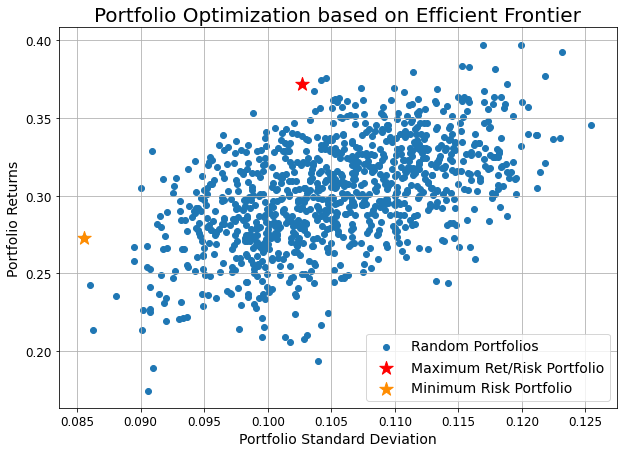

In [31]:
# Highlight the maximum returns/risk portfolio and minimum risk portfolio
plt.figure(figsize=(10, 7))
plt.grid()
plt.scatter(portfolio.std_dev, portfolio.returns, label='Random Portfolios')
plt.scatter(max_ret_by_std_dev.std_dev, max_ret_by_std_dev.returns,
            marker='*', s=200, color='r', label='Maximum Ret/Risk Portfolio')
plt.scatter(min_std_dev.std_dev, min_std_dev.returns,
            marker='*', s=200, color='darkorange', label='Minimum Risk Portfolio')
plt.xlabel('Portfolio Standard Deviation', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Portfolio Returns', fontsize=14)
plt.yticks(fontsize=12)
plt.legend(loc='best', fontsize=14)
plt.title('Portfolio Optimization based on Efficient Frontier', fontsize=20)
plt.show()

<a id='opt_wt'></a> 
## Results

You have saved the weights also while creating the portfolios. You can now get the optimal weights of the portfolio with maximum returns/standard deviation value.

### Portfolio with maximum Sharpe ratio (returns/standard deviation)

In [32]:
# Print the portfolio with the maximum Sharpe ratio
print("The portfolio metrics for the maximum return/std dev. portfolio:")
print(max_ret_by_std_dev)
print("\nThe portfolio weights for each stock in the maximum return/std dev. portfolio is as:")
for i,j in zip(stock_prices.columns,wts_max_ret_by_std_dev):
    print("{} {}%".format(i,round(j*100,2))) 

The portfolio metrics for the maximum return/std dev. portfolio:
returns            0.371503
std_dev            0.102721
returns/std_dev    3.616606
Name: 980, dtype: float64

The portfolio weights for each stock in the maximum return/std dev. portfolio is as:
GLD 15.72%
IYR 4.29%
SPY 8.65%
XLB 5.18%
XLE 0.17%
XLF 15.92%
XLI 2.02%
XLK 15.03%
XLP 3.29%
XLU 6.63%
XLV 10.46%
XLY 12.64%


### Portfolio with minimum risk

In [33]:
# Print the portfolio with the minimum risk
print("The portfolio metrics for the minimum std dev. portfolio:")
print(min_std_dev)
print("\nThe portfolio weights for each stock in the minimum std dev. portfolio is as:")
for i,j in zip(stock_prices.columns,wts_min_std_dev):
    print("{} {}%".format(i,round(j*100,2))) 

The portfolio metrics for the minimum std dev. portfolio:
returns            0.272577
std_dev            0.085537
returns/std_dev    3.186667
Name: 213, dtype: float64

The portfolio weights for each stock in the minimum std dev. portfolio is as:
GLD 17.8%
IYR 1.73%
SPY 4.43%
XLB 2.1%
XLE 5.31%
XLF 6.72%
XLI 4.9%
XLK 8.04%
XLP 14.48%
XLU 21.32%
XLV 2.35%
XLY 10.83%


In [35]:
# Read CSV to get the prices
stock_prices_1 = pd.read_csv("stock.csv",index_col=0)


stock_prices_1 = stock_prices_1.pivot_table(index=['Date'],columns=['ticker'],values=['Close']).rename_axis(None, axis=0)
stock_prices_1.columns = stock_prices_1.columns.droplevel(0)


stock_prices = stock_prices_1
#2005-01-12 to 2007-06-15
m1 = stock_prices.index > '2004-12-01'
m2 = stock_prices.index < '2006-08-01'
stock_prices = stock_prices[np.logical_and.reduce([m1, m2])]
stock_prices.to_csv('stock_period1.csv')

stock_prices

ticker,GLD,IYR,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
2004-12-02,44.950001,59.830002,119.330002,29.410000,35.639999,24.394800,30.879999,21.469999,22.850000,26.860001,29.459999,34.389999
2004-12-03,45.599998,60.869999,119.250000,29.389999,35.990002,24.386677,30.889999,21.620001,22.809999,27.059999,29.260000,34.279999
2004-12-06,45.169998,61.150002,119.209999,29.309999,36.009998,24.370432,30.719999,21.709999,22.660000,27.309999,29.200001,34.220001
2004-12-07,45.110001,60.310001,118.099998,28.690001,35.259998,24.167343,30.469999,21.420000,22.600000,27.100000,28.900000,33.980000
2004-12-08,44.009998,60.430000,118.790001,28.809999,35.500000,24.232330,30.549999,21.400000,22.610001,26.959999,29.320000,34.180000
...,...,...,...,...,...,...,...,...,...,...,...,...
2006-07-25,61.549999,73.339996,126.660004,30.969999,57.099998,26.628757,32.130001,19.500000,24.740000,33.910000,31.840000,32.310001
2006-07-26,62.000000,73.650002,126.830002,30.900000,58.250000,26.596264,31.719999,19.549999,24.620001,34.029999,31.990000,31.940001
2006-07-27,62.900002,73.099998,126.709999,30.219999,57.750000,26.441917,31.660000,19.490000,24.459999,33.759998,31.830000,31.870001
2006-07-28,63.110001,74.190002,127.980003,30.770000,57.770000,26.913078,32.020000,19.830000,24.690001,33.990002,32.000000,32.259998


In [13]:
# Calculate annualised returns
total_returns = ((((stock_prices.iloc[-1]-stock_prices.iloc[0]) / stock_prices.iloc[0]) + 1)**(len(stock_prices)/len(stock_prices)) - 1)

In [14]:
rnd_nums = list(np.random.random(num_of_stocks))
weights = list(rnd_nums/sum(rnd_nums))

In [15]:
# Create an empty dataframe
portfolio = pd.DataFrame()
weights_array = []

# Initialize the number of portfolios
num_of_portfolios = 1000

# Get the number of stocks available in the data file
num_of_stocks = stock_prices.shape[1]

# Calculate daily returns
stock_returns = stock_prices.pct_change().dropna()

# Run the loop for each portfolio
for i in range(num_of_portfolios):
    # Generate random portfolio
    rnd_nums = list(np.random.random(num_of_stocks))
    
    # Ensure the sum of weights is 1
    weights = list(rnd_nums/sum(rnd_nums))
    
    # Save weight allocation in a list
    weights_array.append(weights)
    
    # Save the portfolio returns and portfolio standard deviation values along with its ratio
    portfolio.loc[i, 'returns'] = sum(weights * total_returns)
    
    # Calculate the portfolio returns
    portfolio_rets = stock_returns * weights
    
    # Caclulate the portfolio standard deviation
    portfolio.loc[i, 'std_dev'] = portfolio_rets.sum(axis=1).std()*math.sqrt(252)

    # Caclulate the portfolio Sharpe 
    portfolio.loc[i, 'returns/std_dev'] = portfolio.loc[i, 'returns'] / portfolio.loc[i, 'std_dev']


In [16]:
portfolio

,returns,std_dev,returns/std_dev
0,0.371857,0.105199,3.534786
1,0.389463,0.112380,3.465581
2,0.271595,0.099892,2.718878
3,0.430246,0.106224,4.050348
4,0.389467,0.105708,3.684358
...,...,...,...
995,0.353730,0.099428,3.557668
996,0.379882,0.110502,3.437789
997,0.358072,0.107047,3.344993
998,0.321391,0.091101,3.527852


In [17]:
# Identify the portfolio with the maximum returns/standard deviation using idxmax() function
max_ret_by_std_dev = portfolio.iloc[portfolio['returns/std_dev'].idxmax()]
wts_max_ret_by_std_dev = weights_array[portfolio['returns/std_dev'].idxmax()]

# Similarly identify the portfolio with the minimum standard deviation using idxmin() function
min_std_dev = portfolio.iloc[portfolio['std_dev'].idxmin()]
wts_min_std_dev = weights_array[portfolio['std_dev'].idxmin()]

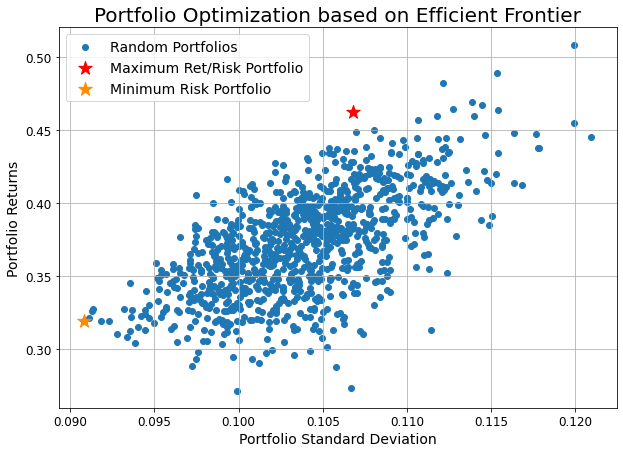

In [18]:
# Highlight the maximum returns/risk portfolio and minimum risk portfolio
plt.figure(figsize=(10, 7))
plt.grid()
plt.scatter(portfolio.std_dev, portfolio.returns, label='Random Portfolios')
plt.scatter(max_ret_by_std_dev.std_dev, max_ret_by_std_dev.returns,
            marker='*', s=200, color='r', label='Maximum Ret/Risk Portfolio')
plt.scatter(min_std_dev.std_dev, min_std_dev.returns,
            marker='*', s=200, color='darkorange', label='Minimum Risk Portfolio')
plt.xlabel('Portfolio Standard Deviation', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Portfolio Returns', fontsize=14)
plt.yticks(fontsize=12)
plt.legend(loc='best', fontsize=14)
plt.title('Portfolio Optimization based on Efficient Frontier', fontsize=20)
plt.show()

In [19]:
# Print the portfolio with the maximum Sharpe ratio
print("The portfolio metrics for the maximum return/std dev. portfolio:")
print(max_ret_by_std_dev)
print("\nThe portfolio weights for each stock in the maximum return/std dev. portfolio is as:")
for i,j in zip(stock_prices.columns,wts_max_ret_by_std_dev):
    print("{} {}%".format(i,round(j*100,2))) 

The portfolio metrics for the maximum return/std dev. portfolio:
returns            0.462285
std_dev            0.106787
returns/std_dev    4.329019
Name: 848, dtype: float64

The portfolio weights for each stock in the maximum return/std dev. portfolio is as:
GLD 16.32%
IYR 6.64%
SPY 1.43%
XLB 5.21%
XLE 17.16%
XLF 8.39%
XLI 0.75%
XLK 2.34%
XLP 6.91%
XLU 17.7%
XLV 13.92%
XLY 3.22%


In [20]:
# Print the portfolio with the minimum risk
print("The portfolio metrics for the minimum std dev. portfolio:")
print(min_std_dev)
print("\nThe portfolio weights for each stock in the minimum std dev. portfolio is as:")
for i,j in zip(stock_prices.columns,wts_min_std_dev):
    print("{} {}%".format(i,round(j*100,2))) 

The portfolio metrics for the minimum std dev. portfolio:
returns            0.319145
std_dev            0.090823
returns/std_dev    3.513912
Name: 831, dtype: float64

The portfolio weights for each stock in the minimum std dev. portfolio is as:
GLD 9.29%
IYR 6.59%
SPY 15.54%
XLB 1.34%
XLE 0.41%
XLF 3.2%
XLI 13.28%
XLK 5.82%
XLP 16.77%
XLU 11.84%
XLV 13.75%
XLY 2.15%


## Conclusion



In [21]:
#plt.hist(np.random.random_sample(1000))